# Computing the energy density of the Glasma in the MV model

In this notebook we compute the energy density of the Glasma in the MV model and compare the result to Tuomas Lappi's value from 2006 (see [**arXiv:hep-ph/0606207**](https://arxiv.org/abs/hep-ph/0606207)). By reproducing the same energy density we can be sure that our code works correctly. At $\tau_0 = 1.0 / g^2 \mu$ we obtain $\varepsilon(\tau_0) = 0.262 (g^2 \mu)^4 / g^2 $ which translates to $\varepsilon(\tau_0) = 136 \, \mathrm{GeV} / \mathrm{fm}^3$ for $g^2 \mu = 2.0 \, \mathrm{GeV}$ and $\varepsilon(\tau_0) = 691 \, \mathrm{GeV} / \mathrm{fm}^3$ for $g^2 \mu = 3.0 \, \mathrm{GeV}$. The numbers from [**arXiv:hep-ph/0606207**](https://arxiv.org/abs/hep-ph/0606207) are $130 \, \mathrm{GeV} / \mathrm{fm}^3$ and $700 \, \mathrm{GeV} / \mathrm{fm}^3$. Close enough.

0 0.0
1 0.0625
2 0.125
3 0.1875
4 0.25
5 0.3125
6 0.375
7 0.4375
8 0.5
9 0.5625
10 0.625
11 0.6875
12 0.75
13 0.8125
14 0.875
15 0.9375
16 1.0
17 1.0625
18 1.125
19 1.1875
20 1.25
21 1.3125
22 1.375
23 1.4375
24 1.5
25 1.5625
26 1.625
27 1.6875
28 1.75
29 1.8125
30 1.875
31 1.9375
32 2.0
33 2.0625
34 2.125
35 2.1875
36 2.25
37 2.3125
38 2.375
39 2.4375
40 2.5
41 2.5625
42 2.625
43 2.6875
44 2.75
45 2.8125
46 2.875
47 2.9375


CUDA (GPU) is not available. Falling back to CPU.
Computation device set to: numba (CPU parallelization)

Gauge group set to: SU(2)

Precision set to: Double precision (float64)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
+++++++++++++++++++++++++++++++++++++ PARAMETERS USED FOR GLASMA: +++++++++++++++++++++++++++++++++++++ 
No. of events, N_Events  =  1
No. of sheets, N_Sheets  =  1 

Length of the simulation box, L_tranverse  =  16.0 fm
Number of lattice points, N_LatticePoints  =  32
Lattice spacing,

100%|██████████| 48/48 [00:09<00:00,  4.90it/s]


Epsilon_0_Average [0.         0.65594553 0.54049959 0.49657342 0.46908674 0.44711736
 0.4271304  0.40772365 0.38831364 0.36869728 0.34887527 0.3289688
 0.30917283 0.28972383 0.27087323 0.25286333 0.23590603 0.22016584
 0.2057491  0.19270065 0.18100789 0.17061054 0.16141365 0.15330104
 0.14614694 0.13982478 0.13421297 0.12919838 0.12467837 0.1205621
 0.1167714  0.1132412  0.10991953 0.10676677 0.10375446 0.10086348
 0.09808212 0.09540403 0.09282636 0.09034817 0.08796925 0.08568923
 0.08350717 0.08142129 0.07942906 0.07752737 0.0757127  0.07398139
 0.        ]

Averaged Results:
Time-step	 Time	  Epsilon_0 	  Pressure_L 	  EL_Ratio_Diff
Time-step 	 Time 	 Epsilon_0 (Avg ± Error)
0 	 0.0000 	 0.0000e+00 ± 0.0000e+00
1 	 0.0625 	 6.5595e-01 ± 0.0000e+00
2 	 0.1250 	 5.4050e-01 ± 0.0000e+00
3 	 0.1875 	 4.9657e-01 ± 0.0000e+00
4 	 0.2500 	 4.6909e-01 ± 0.0000e+00
5 	 0.3125 	 4.4712e-01 ± 0.0000e+00
6 	 0.3750 	 4.2713e-01 ± 0.0000e+00
7 	 0.4375 	 4.0772e-01 ± 0.0000e+00
8 	 0.5000 	 3.883

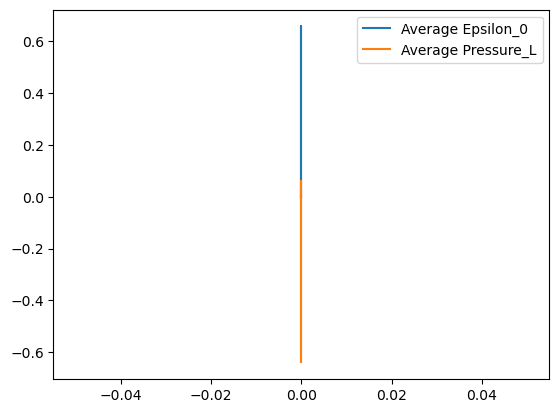

In [1]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# MODULE IMPORTS AND PATH CONFIGURATION
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import sys
import os

import pickle
import copy
import numpy as np
import pandas as pd

from tqdm import tqdm
from time import time
from datetime import datetime
from matplotlib import pyplot as plt, rc
#import matplotlib.pyplot as plt
#from matplotlib import rc

# Add parent directory to Python path (enables importing modules from ../)
# Required for accessing 'curraun' or other parent-dir packages
# Import curraun and other packages, thus enabling access to its modules
sys.path.append('..')  
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




# =========================================================================================================== 
# ======================================== Environment Configuration ========================================
Option_Computation_device = 1     
Option_GPU_ID = "2, 3"  
# Set the computation device for running the code     
# Initialization of the computation device in the module: numba_target.py              
# 1 : GPU (CUDA : Compute Unified Device Architecture)
# 2 : CPU (Numba)
# 3 : Python
# Set to the GPU ID you want to use GPU (Computation_device = 1),   check with `nvidia-smi` command,   Comma-separated GPU device IDs

Option_Gauge_group = 2
# Set the gauge group for the simulation
# Initialization of the gauge group in the module: su.py
# 2 : SU(2)
# 3 : SU(3)
# 4 : SU(2) Complex

Option_Precision_mode = 2 
# Set the precision mode of variable for the simulation         
# Initialization of the precision mode in th module: energy.py
# 1 : Single precision (float32)
# 2 : Double precision (float64)
# =========================================================================================================== 


N_Events = 1                                                        # Number of events [Dimensionless]
N_Sheets = 1                                                        # Number of color sheets [Dimensionless]

# Lattice Parameters
N_LatticePoints = 32                                               # Number of lattice points [Dimensionless]
L_tranverse = 16.0                                                        # Transverse size of the simulation box  [fm]
a = L_tranverse / N_LatticePoints                                         # Lattice Spacing in the transverse direction  [fm]                  


# Conversion Factors
hbarc = 0.197326                                                    # hbar*c = 0.197326  [GeV-fm]
delta_x = a 
GeV_to_Latt = delta_x/hbarc                                         # GeV to lattice units  [GeV⁻¹]
fm_to_Latt  = 1.0/delta_x                                           # fm to lattice units   [fm⁻¹]
Latt_to_GeV = hbarc/delta_x                                         # lattice units to GeV  [GeV]
Latt_to_fm  = delta_x                                               # lattice units to fm   [fm]

# Physics Parameters
g2mu = 1.0                                                          # g²mu  [GeV]
g = 2.0                                                             # Coupling constant   [Dimensionless]
mu = g2mu / (g**2 )                                                 # MV model parameter  [GeV]
mu_Latt = mu*GeV_to_Latt



# Time Evolution
Option_time_calculation_method = 2
tau = 10.0
N_timesteps_per_latt_spacing = 16                                                   # Number of time steps per transverse spacing  [Dimensionless] 

if Option_time_calculation_method == 1:
    tau_final_Phys = tau                                                # Maximum proper time  [fm] 
elif Option_time_calculation_method == 2:
    tau_final_Phys = tau * (hbarc/g2mu)                                 # Maximum proper time  [fm] (in units of g²mu)  
                                                                        # tau = 30.0 for N = 4 
else:
    raise ValueError("\nInvalid time calculation method selection: Use 1 or 2)")
               
tau_final_Latt = tau_final_Phys * fm_to_Latt                                        # Maximum proper time in lattice units  [Dimensionless] 
dt = 1.0 / N_timesteps_per_latt_spacing                                             # Time step in lattice units  [Dimensionless]
N_total_time_steps = int(tau_final_Latt) * N_timesteps_per_latt_spacing             # Total No. of time steps for full Glasma simulation  [Dimensionless] 

for i in range(N_total_time_steps):
    time = i*dt
    print(i, time)
print("\n")


# Cutoff Scales
m_IR = 0.00001                                                      # IR regulator  [GeV]                                                         
                                                                    # No infrared regulation, except global charge neutrality [????????]
m_UV = 100000.0                                                     # UV regulator  [GeV]

m_IR_Latt = m_IR*GeV_to_Latt
m_UV_Latt = m_UV*GeV_to_Latt



# Lyapunov Parameters
Lypnv_alpha        =  0.0001                                                    # [Dimensionless]
Lypnv_noise_scale  =  1.0                                                       # Scaling factor for the noise    [Dimensionless]  

Lypnv_noise_Phys  =  Lypnv_noise_scale * g2mu                      # Noise for FFT                   [GeV]         
Lypnv_noise_Latt  =  Lypnv_noise_Phys * GeV_to_Latt                # Noise for FFT in lattice units  [Dimensionless]  

Option_Lypnv_noise_type = 2                                                   
# 0: No noise
# 1: Exponential noise
# 2: Power-law noise



# ===========================================================================================================
# Dictionary for Environment variables
Environment_variables = {
    "Computation_device":           Option_Computation_device,
    "GPU_ID":                       Option_GPU_ID,
    "Gauge_group":                  Option_Gauge_group,
    "Precision_mode":               Option_Precision_mode    
}

# Dictionary for Glasma parameters
Glasma_parameters = {    
    'N_Events'  :  N_Events,
    'N_Sheets'  :  N_Sheets,

    'L'  :    L_tranverse,                                                    
    'N'  :    N_LatticePoints,                                          
    'a'  :    a, 

    'hbarc'   :   hbarc,                                               
    'g2mu'    :   g2mu,                                                 
    'g'       :   g,                                                   
    'mu'      :   mu,    
    'mu_Latt' :   mu_Latt,    

    'GeV_to_Latt' :   GeV_to_Latt,                                  
    'fm_to_Latt'  :   fm_to_Latt,                                      
    'Latt_to_GeV' :   Latt_to_GeV,                                     
    'Latt_to_fm'  :   Latt_to_fm,    

    'm_IR'       :   m_IR,                                                 
    'm_UV'       :   m_UV, 
    'm_IR_Latt'  :   m_IR_Latt,                                                 
    'm_UV_Latt'  :   m_UV_Latt,        

    'tau'                          :  tau,
    'tau_final_Phys'               :  tau_final_Phys,                                 
    'tau_final_Latt'               :  tau_final_Latt,  
    'N_timesteps_per_latt_spacing' :  N_timesteps_per_latt_spacing,
    'dt'                           :  dt,                                 
    'N_total_time_steps'           :  N_total_time_steps,       

    'Ly_alpha'             :  Lypnv_alpha, 
    'Ly_noise_scale'       :  Lypnv_noise_scale,
    'Ly_noise_Phys'        :  Lypnv_noise_Phys,
    'Ly_noise_Latt'        :  Lypnv_noise_Latt,
    'Option_Ly_noise_type' :  Option_Lypnv_noise_type                                                                                           
}




# Import necessary modules from the Modules package and assign aliases for easier access
import Modules.Parameters as Parameters_Module
Environment_Config = Parameters_Module.Environment_Setup(Environment_variables)
Glasma_Config      = Parameters_Module.Glasma_Setup(Glasma_parameters)

# Use variables of Parameters_Module
#a = Glasma_Config['L'] / Glasma_Config['N'] 


from Modules.numba_target import use_cuda, use_numba, use_python
print("Using Numba:", use_numba)
print("Using CUDA:", use_cuda)
print("Using Python:", use_python)


import Modules.core as Core_Module              # Imports the core module from the Modules package and assigns it the alias Core_Module
import Modules.mv as MV_Module
import Modules.initial as Initial_Module
#import Modules.energy as Energy_Module          # May be commented, not needed
#import Modules.lyapunov as Lyapunov_Module      # May be commented, not needed

from Modules.energy import Energy
from Modules.lyapunov import Lyapunov_CLASS

Initial_Module.DEBUG = False

print("\nHello, this cell is run at:  ", datetime.now())















#import Modules.Output_16June2025 as Output_Module
from Modules.Output_16June2025 import GlasmaOutput_CLASS

output = GlasmaOutput_CLASS(N_Events, N_total_time_steps)

for i_Event in range(N_Events):         # 0, 1, ..., N_Events-1

    print(f"\nSimulating event", i_Event+1 , "of", N_Events)

    # Initialization
    s = Core_Module.Simulation(N_LatticePoints, dt, g)
    Va = MV_Module.wilson( s, mu_Latt,  m_IR_Latt, m_UV_Latt, N_Sheets )
    Vb = MV_Module.wilson( s, mu_Latt,  m_IR_Latt, m_UV_Latt, N_Sheets )
    Initial_Module.init(s, Va, Vb)
    Energy_density = Energy(s)                                              # Initialize energy computation

    # Lyapunov setup
    s_prime = copy.deepcopy(s)
    Energy_density_prime = Energy(s_prime)
    Ly = Lyapunov_CLASS(s, s_prime)                           # Initialize Lyapunov computation 
    Ly.change_EL(Lypnv_alpha, Lypnv_noise_Latt)

                
    if use_cuda:
        s.copy_to_device()
        meminfo = cuda.current_context().get_memory_info()
        # print("CUDA free memory: {:.2f} GB of {:.2f} GB.".format(meminfo[0] / 1024 ** 3, meminfo[1] / 1024 ** 3))

    Time = np.zeros(N_total_time_steps + 1)
    # Loop for the time steps : i_time = 0, 1, ..., (N_total_time_steps)
    for i_Time in tqdm(range(0, N_total_time_steps)):     # range(0, N_total_time_steps+1)
        #print(f"\nSimulating time", i_Time, N_total_time_steps)

        Time[i_Time] = i_Time*dt

        if i_Time > 0:
            Core_Module.evolve_leapfrog(s)            
            Core_Module.evolve_leapfrog(s_prime)           # Evolve s_prime (copy of s) with changed EL

            Energy_density.compute()                # Energy density calculation
            Energy_density_prime.compute()
            Ly.compute_change_EL(Lypnv_alpha)

            # Store results for averaging
            output.store_event_data(i_Event, i_Time, Energy_density, Energy_density_prime, Ly)
    
# Compute averages across all events
output_data = output.compute_output_Avrg_Var_SD_Error()



import matplotlib.pyplot as plt

# Time axis (assuming glasma.time is properly set)
time = output.time  

# Plot average Epsilon_0 over time
plt.plot(time, output_data['Average']['Epsilon_0'], label='Average Epsilon_0')
plt.plot(time, output_data['Average']['Pressure_L'], label='Average Pressure_L')
plt.legend()





# Access individual statistics:
average = output_data['Average']
variance = output_data['Variance']
standarddeviation = output_data['StandardDeviation']
error = output_data['Error']


Epsilon_0_Average =  average['Epsilon_0']
Epsilon_0_Error   =  error['Epsilon_0']


print("Epsilon_0_Average", Epsilon_0_Average)


#Print some of the averaged quantities
print("\nAveraged Results:")
print("Time-step\t Time\t  Epsilon_0 \t  Pressure_L \t  EL_Ratio_Diff")

print("Time-step \t Time \t Epsilon_0 (Avg ± Error)")


for i_time in range(N_total_time_steps):
    time = i_time * dt
    
    Epsilon_0_Average = average['Epsilon_0'][i_time]
    Epsilon_0_Error   = error['Epsilon_0'][i_time]

    print(f"{i_time} \t {time:.4f} \t {Epsilon_0_Average:.4e} ± {Epsilon_0_Error:.4e}")





    
print(f"\nSimulation completed at {datetime.now()}")



In [2]:
Epsilon_0_Average            =  average['Epsilon_0']
Epsilon_0_Variance           =  variance['Epsilon_0']
Epsilon_0_StandardDeviation  =  standarddeviation['Epsilon_0']
Epsilon_0_Error              =  error['Epsilon_0']
    
Pressure_L_Average            =  average['Pressure_L']
Pressure_L_Variance           =  variance['Pressure_L']
Pressure_L_StandardDeviation  =  standarddeviation['Pressure_L']
Pressure_L_Error              =  error['Pressure_L']
    
Pressure_T_Average            =  average['Pressure_T']
Pressure_T_Variance           =  variance['Pressure_T']
Pressure_T_StandardDeviation  =  standarddeviation['Pressure_T']
Pressure_T_Error              =  error['Pressure_T']

ED_EL_Average            =  average['ED_EL']
ED_EL_Variance           =  variance['ED_EL']
ED_EL_StandardDeviation  =  standarddeviation['ED_EL']
ED_EL_Error              =  error['ED_EL']
    
ED_ET_Average            =  average['ED_ET']
ED_ET_Variance           =  variance['ED_ET']
ED_ET_StandardDeviation  =  standarddeviation['ED_ET']
ED_ET_Error              =  error['ED_ET']

ED_BT_Average            =  average['ED_BT']
ED_BT_Variance           =  variance['ED_BT']
ED_BT_StandardDeviation  =  standarddeviation['ED_BT']
ED_BT_Error              =  error['ED_BT']

ED_BL_Average            =  average['ED_BL']
ED_BL_Variance           =  variance['ED_BL']
ED_BL_StandardDeviation  =  standarddeviation['ED_BL']
ED_BL_Error              =  error['ED_BL']

Epsilon_0_prime_Average            =  average['Epsilon_0_prime']
Epsilon_0_prime_Variance           =  variance['Epsilon_0_prime']
Epsilon_0_prime_StandardDeviation  =  standarddeviation['Epsilon_0_prime']
Epsilon_0_prime_Error              =  error['Epsilon_0_prime']

Pressure_L_prime_Average            =  average['Pressure_L_prime']
Pressure_L_prime_Variance           =  variance['Pressure_L_prime']
Pressure_L_prime_StandardDeviation  =  standarddeviation['Pressure_L_prime']
Pressure_L_prime_Error              =  error['Pressure_L_prime']

Pressure_T_prime_Average            =  average['Pressure_T_prime']
Pressure_T_prime_Variance           =  variance['Pressure_T_prime']
Pressure_T_prime_StandardDeviation  =  standarddeviation['Pressure_T_prime']
Pressure_T_prime_Error              =  error['Pressure_T_prime']

ED_EL_prime_Average            =  average['ED_EL_prime']
ED_EL_prime_Variance           =  variance['ED_EL_prime']
ED_EL_prime_StandardDeviation  =  standarddeviation['ED_EL_prime']
ED_EL_prime_Error              =  error['ED_EL_prime']

ED_ET_prime_Average            =  average['ED_ET_prime']
ED_ET_prime_Variance           =  variance['ED_ET_prime']
ED_ET_prime_StandardDeviation  =  standarddeviation['ED_ET_prime']
ED_ET_prime_Error              =  error['ED_ET_prime']

ED_BL_prime_Average            =  average['ED_BL_prime']
ED_BL_prime_Variance           =  variance['ED_BL_prime']
ED_BL_prime_StandardDeviation  =  standarddeviation['ED_BL_prime']
ED_BL_prime_Error              =  error['ED_BL_prime']

ED_BT_prime_Average            =  average['ED_BT_prime']
ED_BT_prime_Variance           =  variance['ED_BT_prime']
ED_BT_prime_StandardDeviation  =  standarddeviation['ED_BT_prime']
ED_BT_prime_Error              =  error['ED_BT_prime']

EL_Ratio_Diff_Average            =  average['EL_Ratio_Diff']
EL_Ratio_Diff_Variance           =  variance['EL_Ratio_Diff']
EL_Ratio_Diff_StandardDeviation  =  standarddeviation['EL_Ratio_Diff']
EL_Ratio_Diff_Error              =  error['EL_Ratio_Diff']

EL_Ratio_Diff_alpha2_Average            =  average['EL_Ratio_Diff_alpha2']
EL_Ratio_Diff_alpha2_Variance           =  variance['EL_Ratio_Diff_alpha2']
EL_Ratio_Diff_alpha2_StandardDeviation  =  standarddeviation['EL_Ratio_Diff_alpha2']
EL_Ratio_Diff_alpha2_Error              =  error['EL_Ratio_Diff_alpha2']





In [3]:
x1 =  Time                                                      
y1 = EL_Ratio_Diff_Average
y1_var = EL_Ratio_Diff_Variance
y1_std = EL_Ratio_Diff_StandardDeviation
y1_error = EL_Ratio_Diff_Error


#Plotting here using the data from the dictionary:
label_dynamic = rf"$Noise~Type = {noise_type_str}$, $N = {N}$, $\alpha = {alpha_str}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$, $N_{{events}} = {N_events}$"

plt.errorbar(x1, y1, y1_error,   label=label_dynamic,  errorevery=10,  linewidth=1, linestyle="solid", color="red", ecolor="blue", elinewidth=1,  uplims=True, lolims=True)#, capsize=3, capthick=1)
plt.title(r"$g^2 \mu \tau$    vs    $\mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")            # Plot title
plt.xlabel(r"$g^2 \mu \tau$")
plt.ylabel(r"$\mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")
#plt.xlim(0.0, 200)                                                                                                  # To change the x scale       
#plt.ylim(0.0, 0.00000001)                                                                                           # To change the y scale      
plt.legend()
plt.show()


NameError: name 'noise_type_str' is not defined

In [ ]:
#import Modules.Output_16June2025 as Output_Module
from Modules.Output_16June2025 import GlasmaOutput_CLASS

output = GlasmaOutput_CLASS(N_Events, N_total_time_steps)

for i_Event in range(1, N_Events+1):

    print(f"\nSimulating event", i_Event , "of", N_Events)

    # Initialization
    s = Core_Module.Simulation(N_LatticePoints, dt, g)
    Va = MV_Module.wilson( s, mu_Latt,  m_IR_Latt, m_UV_Latt, N_Sheets )
    Vb = MV_Module.wilson( s, mu_Latt,  m_IR_Latt, m_UV_Latt, N_Sheets )
    Initial_Module.init(s, Va, Vb)
    Energy_density = Energy(s)                                              # Initialize energy computation

    # Lyapunov setup
    s_prime = copy.deepcopy(s)
    Energy_density_prime = Energy(s_prime)
    Ly = Lyapunov_CLASS(s, s_prime)                           # Initialize Lyapunov computation 
    Ly.change_EL(Lypnv_alpha, Lypnv_noise_Latt)

                
    if use_cuda:
        s.copy_to_device()
        meminfo = cuda.current_context().get_memory_info()
        # print("CUDA free memory: {:.2f} GB of {:.2f} GB.".format(meminfo[0] / 1024 ** 3, meminfo[1] / 1024 ** 3))


    # Loop for the time steps : i_time = 0, 1, ..., (N_total_time_steps)
    for i_time in tqdm(range(0, N_total_time_steps+1)):
        print(f"\nSimulating time", i_time, N_total_time_steps)

        if i_time > 0:
            Core_Module.evolve_leapfrog(s)            
            Core_Module.evolve_leapfrog(s_prime)           # Evolve s_prime (copy of s) with changed EL

        Energy_density.compute()                # Energy density calculation
        Energy_density_prime.compute()
        Ly.compute_change_EL()

        # Store results for averaging
        Output = Output_Quantities_CLASS(i_Event, i_time)
        Output.store_event_data(i_Event, i_time, Energy_density, Energy_density_prime, Ly)
    
    # Compute averages across all events
    #results = averager.compute_averages()
    output.compute_averages()
    print(f"\nSimulation completed at {datetime.now()}")




In [ ]:
def compute(dict_Glasma):

    output_quantities = [    "Epsilon_0", "Pressure_L", "Pressure_T", "ED_EL", "ED_ET", "ED_BL", "ED_BT",
                "Epsilon_0_prime", "Pressure_L_prime", "Pressure_T_prime", "ED_EL_prime", "ED_ET_prime", "ED_BL_prime", "ED_BT_prime",
                "EL_Ratio_Diff", "EL_Ratio_Diff_alpha2"   ]
    
    # Initialize data storage
    i_time_initial = 1
    N_Time_Steps = N_total_time_steps - i_time_initial

    Time_data = np.zeros(N_Time_Steps)
    all_output = {i_output_quantity: np.zeros((N_Events, N_Time_Steps)) for i_output_quantity in output_quantities}
    



    # Loop for the events : i_Event = 1, ..., N_Events
    for i_Event in range(1, N_Events+1):

        print(f"\nSimulating event", i_Event , "of", N_Events)

        # Initialization
        s = Core_Module.Simulation(N_LatticePoints, dt, g)
        Va = MV_Module.wilson(s, mu_Latt,  m_IR_Latt, m_UV_Latt, N_Sheets )
        Vb = MV_Module.wilson(s, mu_Latt,  m_IR_Latt, m_UV_Latt, N_Sheets )
        Initial_Module.init(s, Va, Vb)
        Energy_density = Energy(s)                                              # Initialize energy computation

        # Lyapunov setup
        s_prime = copy.deepcopy(s)
        Energy_density_prime = Energy(s_prime)
        Ly = Lyapunov(s, s_prime)                           # Initialize Lyapunov computation 
        Ly.change_EL(Lypnv_alpha, Lypnv_noise_Latt)

        
        
        if use_cuda:
            s.copy_to_device()
            meminfo = cuda.current_context().get_memory_info()
            # print("CUDA free memory: {:.2f} GB of {:.2f} GB.".format(meminfo[0] / 1024 ** 3, meminfo[1] / 1024 ** 3))


        # Loop for the time steps : i_time = 0, 1, ..., (N_total_time_steps)
        for i_time in tqdm(range(0, N_total_time_steps+1)):
            print(f"\nSimulating time", i_time, N_total_time_steps)

            if i_time >= i_time_initial:
                Core_Module.evolve_leapfrog(s)            
                Core_Module.evolve_leapfrog(s_prime)           # Evolve s_prime (copy of s) with changed EL

                Energy_density.compute()                # Energy density calculation
                Energy_density_prime.compute()
                Ly.compute_change_EL()

                # Store time only once
                #if i_Event == 0:
                    #N_Time_Steps[N_total_time_steps - i_time] = step * params['dt']



t1 = time()
r_lappi = compute(Glasma_parameters)
t2 = time() 
  

In [ ]:
def compute(dict_Glasma):

    output_keys = [    "Epsilon_0", "Pressure_L", "Pressure_T", "ED_EL", "ED_ET", "ED_BL", "ED_BT",
                "Epsilon_0_prime", "Pressure_L_prime", "Pressure_T_prime", "ED_EL_prime", "ED_ET_prime", "ED_BL_prime", "ED_BT_prime",
                "EL_Ratio_Diff", "EL_Ratio_Diff_alpha2"   ]
    
    #output_keys_Statistics =  [ "EL_Ratio_Diff_Mean", "EL_Ratio_Diff_Variance", "EL_Ratio_Diff_SD", "EL_Ratio_Diff_Error","EL_Ratio_Diff_alpha2_Mean", "EL_Ratio_Diff_alpha2_Variance", "EL_Ratio_Diff_alpha2_SD", "EL_Ratio_Diff_alpha2_Error"   ] 
    
    # Generate statistics keys for all base variables
    output_keys_Statistics = []
    for var in output_keys:
        output_keys_Statistics.extend(  [f"{var}_Average",  f"{var}_Variance",  f"{var}_SD",  f"{var}_Error"]  )

    output = {key: [] for key in output_keys}

    # Epsilon_0 = energy,   Epsilon_0_prime = energyp
    # Pressure_L = pL,      Pressure_L_prime = pLp
    # Pressure_T = pT,      Pressure_T_prime = pTp 
    # ED_EL = EL,           ED_EL_prime = ELp 
    # ED_ET = ET,           ED_ET_prime = ETp
    # ED_BL = BL,           ED_BL_prime = BLp
    # ED_BT = BT,           ED_BT_prime = BTp
 
    """
    # derived parameters
    a = dict_Glasma['L'] / dict_Glasma['N']
    E0 = dict_Glasma['N'] / dict_Glasma['L'] * hbarc
    DT = 1.0 / dict_Glasma['N_timesteps_per_latt_spacing']
    maxt = int(dict_Glasma['tau_final_Phys'] / a) * dict_Glasma['N_timesteps_per_latt_spacing']       

    print("a  (in fm) = ", a, delta_x)
    print("E0  (in GeV) = ", E0, Latt_to_GeV)
    print("DT  (= 1/ DTS) = ", DT, dt)
    print("maxt   = ", maxt)
    print("N_Events = ", N_Events)
   
    """

    i_time = 1


    # Loop for the events
    for i_Event in range(N_Events):

        print(f"\nSimulating event", i_Event+1, "of", N_Events)

        # Initialization
        s = Core_Module.Simulation(N_LatticePoints, dt, g)
        Va = MV_Module.wilson(s, mu_Latt,  m_IR_Latt, m_UV_Latt, N_Sheets )
        Vb = MV_Module.wilson(s, mu_Latt,  m_IR_Latt, m_UV_Latt, N_Sheets )
        Initial_Module.init(s, Va, Vb)
        Energy_density = Energy(s)                                              # Initialize energy computation

        #print("mu (in dimensionless units),                     mu_Latt = ", mu_Latt, "lattice units")
        #print("Infra-red cutoff    (in dimensionless units),  m_IR_Latt = ", m_IR_Latt, "lattice units")
        #print("Ultra-violet cutoff (in dimensionless units),  m_UV_Latt = ", m_UV_Latt, "lattice units")
        #print("Va = ", Va)
        #print("Vb = ", Vb)


        # Lyapunov setup
        s_prime = copy.deepcopy(s)
        Energy_density_prime = Energy(s_prime)
        Ly = Lyapunov(s, s_prime)                           # Initialize Lyapunov computation 
        Ly.change_EL(Lypnv_alpha, Lypnv_noise_Latt)

        #Temporary storage for this event
        #Temporary_event_data = {"EL": [], "BL": [], "ET": [], "BT": [],"ELp": [], "BLp": [], "ETp": [], "BTp": [],"energy": [], "pL": [], "pT": [],
         #   "energyp": [], "pLp": [], "pTp": [],"ratio_dif": []        }

        Temporary_event_data = {key: [] for key in output_keys}
        taus = []
        
        if use_cuda:
            s.copy_to_device()
            meminfo = cuda.current_context().get_memory_info()
            # print("CUDA free memory: {:.2f} GB of {:.2f} GB.".format(meminfo[0] / 1024 ** 3, meminfo[1] / 1024 ** 3))



        for t in tqdm(range(N_total_time_steps)):

            Core_Module.evolve_leapfrog(s)            
            Core_Module.evolve_leapfrog(s_prime)           # Evolve s_prime (copy of s) with changed EL

            if t >= i_time:
                # unit factors (GeV^2)
                units = E0 ** 2 / (s.g ** 2)

                # color factors (for quarks)
                Nc = core.su.NC
                f = 2 * s.g ** 2 / (2 * Nc)


                #Energy density calculation
                Energy_density.compute()
                Energy_density_prime.compute()
                Ly.compute_change_EL()


                taus.append(t)
    
                ED_EL  =  ED_EL.append(Energy_density.EL_mean)                
                EL_Ratio_Diff_List =  EL_Ratio_Diff.append(Ly.EL_Ratio_Dif)

        #END DO over t
        
        EL_Ratio_Diff_Array = np.array(EL_Ratio_Diff_List)
        output["ratio_dif"] = output["ratio_dif"].append(ratio_dif_array)


        # After event completes, append to output
        for key in Temporary_event_data:
            output[key].append(np.array(Temporary_event_data[key]))


    output["ratio_dif_variance"] = np.var(np.array(output["EL_Ratio_Diff"]), axis=0)        # Computed variance of the ratio_dif
    output["ratio_dif_std"]      = np.std(np.array(output["EL_Ratio_Diff"]), axis=0)        # Calculate variance and standard deviation of the ratio_dif before calculating mean because otherwise it will be wrong due to file names changed
    output["ratio_dif_error"   ] = np.std(np.array(output["EL_Ratio_Diff"]), axis=0)/np.sqrt(N_events)      # Error


    output["ratio_difalpha2_variance"] = np.var(np.array(output["EL_Ratio_Diff_alpha2"]), axis=0)    
    output["ratio_difalpha2_std"]      = np.std(np.array(output["EL_Ratio_Diff_alpha2"]), axis=0)    
    output["ratio_difalpha2_error"   ] = np.std(np.array(output["EL_Ratio_Diff_alpha2"]), axis=0)/np.sqrt(N_events)    

    for key in event_data:
        output[key] = np.mean(np.array(output[key]), axis=0)




    output["energy"] = np.mean(np.array(output["energy"]), axis=0)



        #start_t = 1
    
    # event loop
    #for e in range(dict_Glasma['N_Events']):
        #print("Simulating event {} of {}".format(e+1, p['NE']))            # Commented by Pooja
        #print("\nSimulating event {} of {}".format(e+1, dict_Glasma['N_Events']))           # Added by Pooja


        # initialization
        #s = Core_Module.Simulation(dict_Glasma['N'], DT, dict_Glasma['g'])
        #va = mv.wilson(s, mu=dict_Glasma['MU'] / E0, m=dict_Glasma['M'] / E0, uv=dict_Glasma['UV'] / E0, num_sheets=dict_Glasma['NS'])
        #vb = mv.wilson(s, mu=dict_Glasma['MU'] / E0, m=dict_Glasma['M'] / E0, uv=dict_Glasma['UV'] / E0, num_sheets=dict_Glasma['NS'])
        #initial.init(s, va, vb)

        #en = Energy(s)                                              # initialize energy computation

        

t1 = time()
r_lappi = compute(Glasma_parameters)
t2 = time() 
  